In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 12
A = np.matrix([
[0, 3, 0, 2, 0, 1, 5, 4, 4, 0, 0, 1],
[3, 0, 3, 2, 0, 3, 0, 4, 0, 5, 4, 4],
[0, 3, 0, 0, 0, 0, 2, 0, 4, 1, 4, 5],
[2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0],
[0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0],
[1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[5, 0, 2, 1, 0, 0, 0, 4, 4, 0, 0, 5],
[4, 4, 0, 0, 4, 0, 4, 0, 1, 2, 5, 4],
[4, 0, 4, 0, 1, 0, 4, 1, 0, 0, 5, 0],
[0, 5, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0],
[0, 4, 4, 2, 0, 0, 0, 5, 5, 0, 0, 5],
[1, 4, 5, 0, 0, 1, 5, 4, 0, 0, 5, 0],
])
G = nx.from_numpy_matrix(A)
G.edges(data = True)

EdgeDataView([(0, 1, {'weight': 3}), (0, 3, {'weight': 2}), (0, 5, {'weight': 1}), (0, 6, {'weight': 5}), (0, 7, {'weight': 4}), (0, 8, {'weight': 4}), (0, 11, {'weight': 1}), (1, 2, {'weight': 3}), (1, 3, {'weight': 2}), (1, 5, {'weight': 3}), (1, 7, {'weight': 4}), (1, 9, {'weight': 5}), (1, 10, {'weight': 4}), (1, 11, {'weight': 4}), (2, 6, {'weight': 2}), (2, 8, {'weight': 4}), (2, 9, {'weight': 1}), (2, 10, {'weight': 4}), (2, 11, {'weight': 5}), (3, 6, {'weight': 1}), (3, 9, {'weight': 1}), (3, 10, {'weight': 2}), (4, 7, {'weight': 4}), (4, 8, {'weight': 1}), (5, 11, {'weight': 1}), (6, 7, {'weight': 4}), (6, 8, {'weight': 4}), (6, 11, {'weight': 5}), (7, 8, {'weight': 1}), (7, 9, {'weight': 2}), (7, 10, {'weight': 5}), (7, 11, {'weight': 4}), (8, 10, {'weight': 5}), (10, 11, {'weight': 5})])

In [3]:
import math
pos = {}
R = 15
for i in range(n):
    pos[i] = (R * np.cos(2 * i * np.pi / n), R * np.sin(2 * i * np.pi / n))

def dist(x, y):
    return sum([(pos[x][i] - pos[y][i]) ** 2 for i in range(2)])

def get_bounds(i):
    edges = [j for j in G[i]]
    
    u = -1
    v = -1
    
    min_cos = 1e9
    
    for x in edges:
        for y in edges:
            a = dist(i, x)
            b = dist(i, y)
            c = dist(x, y)
            
            cs = (a + b - c) / (2 * (a * b) ** 0.5)
            if cs <  min_cos:
                u = x
                v = y
                min_cos = cs
    return u, v

def get_middle(u, v):
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    return (x1 + x2) / 2, (y1 + y2) / 2

left = []
right = []
for i in range(n):
    x, y = get_bounds(i)
    left.append(x)
    right.append(y)
print(left)
print(right)

[1, 0, 1, 1, 7, 1, 3, 6, 7, 1, 8, 0]
[11, 2, 6, 6, 8, 11, 7, 8, 10, 7, 11, 10]


In [4]:
s = 4
t = 3

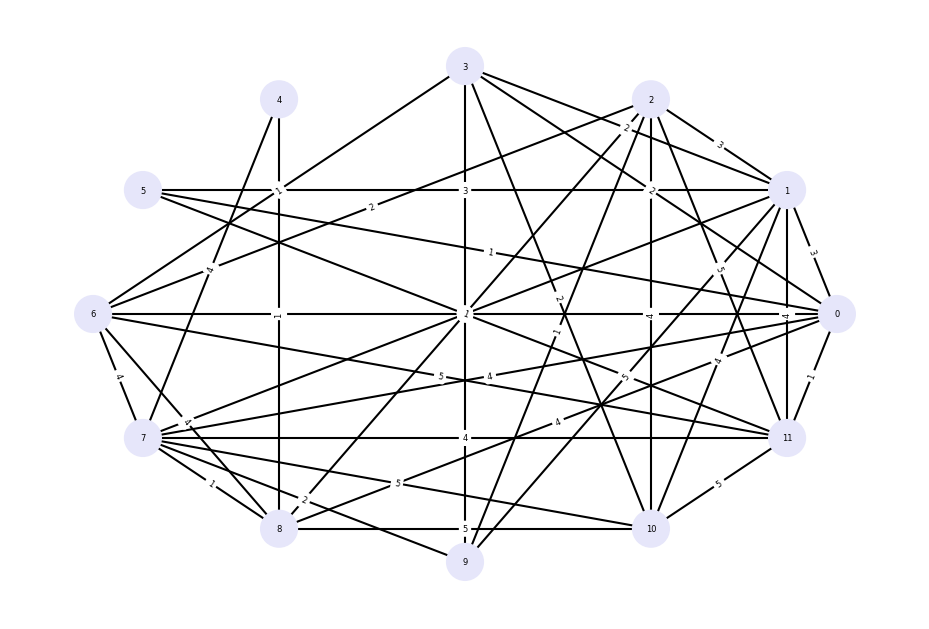

In [5]:
path = [[i] for i in range(n)]
def draw():
    plt.figure(dpi = 150)
    labeldict = {}
    for v in list(G.nodes()):
        labeldict[v] = str(path[v])[1:-1]
    nx.draw(G, pos, node_size = [300 for i in range(len(G.nodes()))],
            labels = labeldict,
            node_color = ['#e6e6fa' for i in range(G.number_of_nodes())],
            font_color = "black", with_labels=True, font_size = 4)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos,edge_labels=labels, font_size = 4)
    plt.show()
    return True
draw()
def draw_cut():
    plt.figure(dpi = 150)
    left[s], right[s] = get_bounds(s)
    C = nx.Graph()
    C.add_edge(".", "*")
    posC = {}
    posC["*"] = get_middle(s, left[s])
    posC["."] = get_middle(s, right[s])
    labeldict = {}
    for v in list(G.nodes()):
        labeldict[v] = str(path[v])[1:-1]
    nx.draw(G, pos, node_size = [300 for i in range(len(G.nodes()))],
            labels = labeldict,
            node_color = ['#e6e6fa' for i in range(G.number_of_nodes())],
            font_color = "black", with_labels=True, font_size = 4)
    nx.draw(C, posC, style='--', with_labels = True,
            font_size = 4, node_size = 1, edge_color = ['red' for x,y in G.edges()])
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos,edge_labels=labels, font_size = 4)
    plt.show()
    return True

Ищем путь с максимальной пропускной способностью из v4 в v3


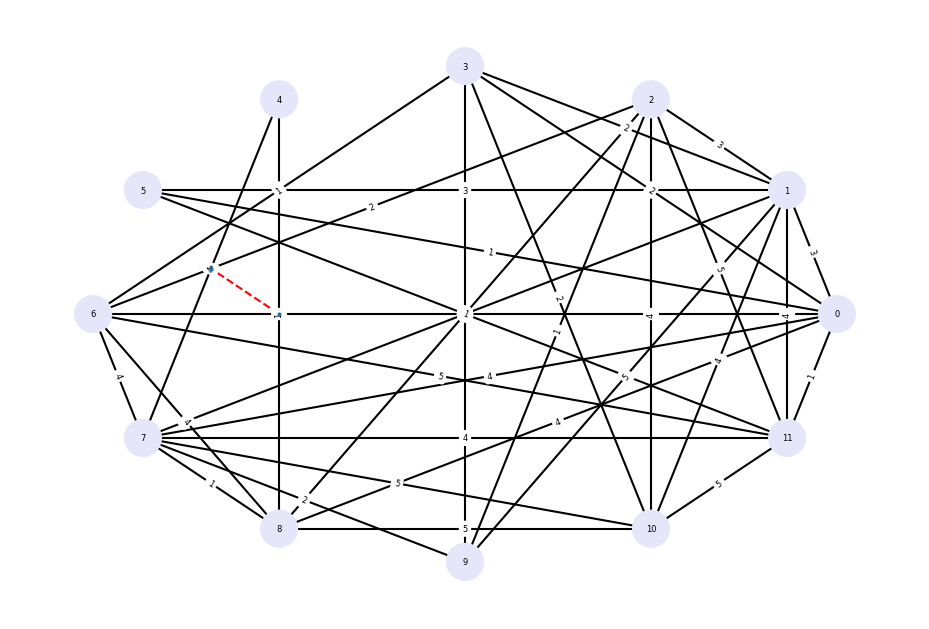

Вес максимального ребра из v4 равен 4
Закарачиваем все ребра с пропускной способностью >= 4


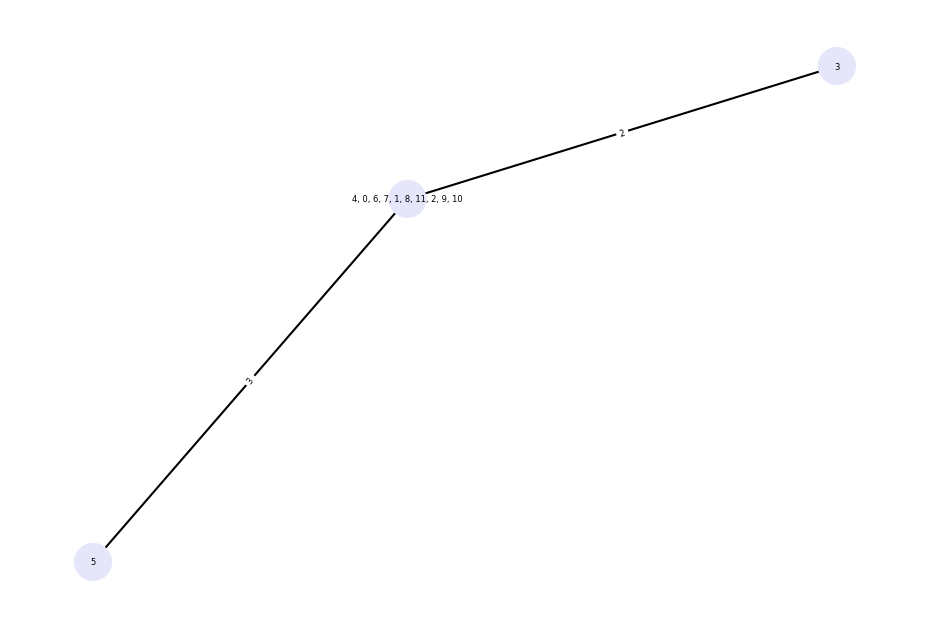

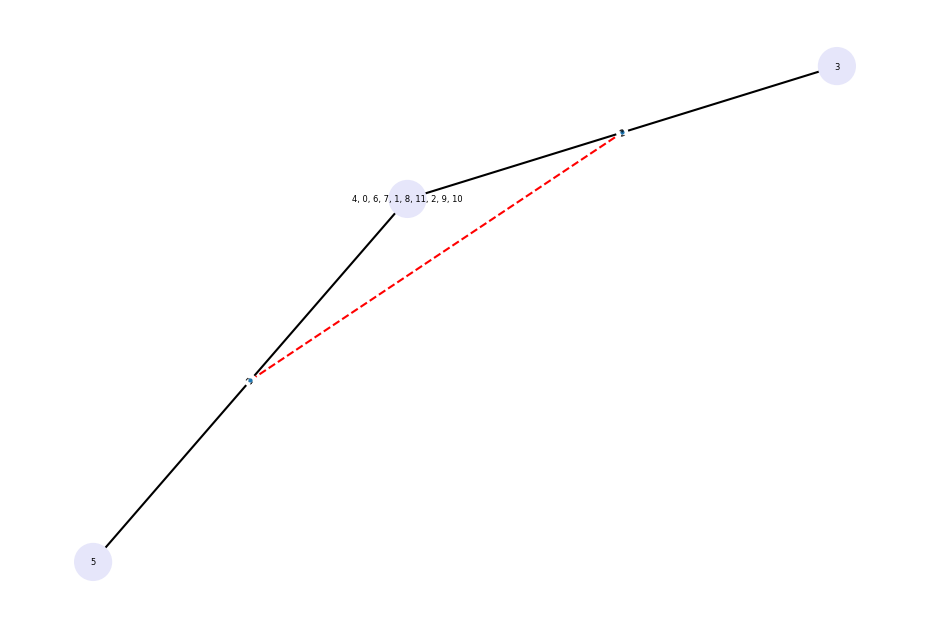

Вес максимального ребра из v4 равен 3
Закарачиваем все ребра с пропускной способностью >= 3


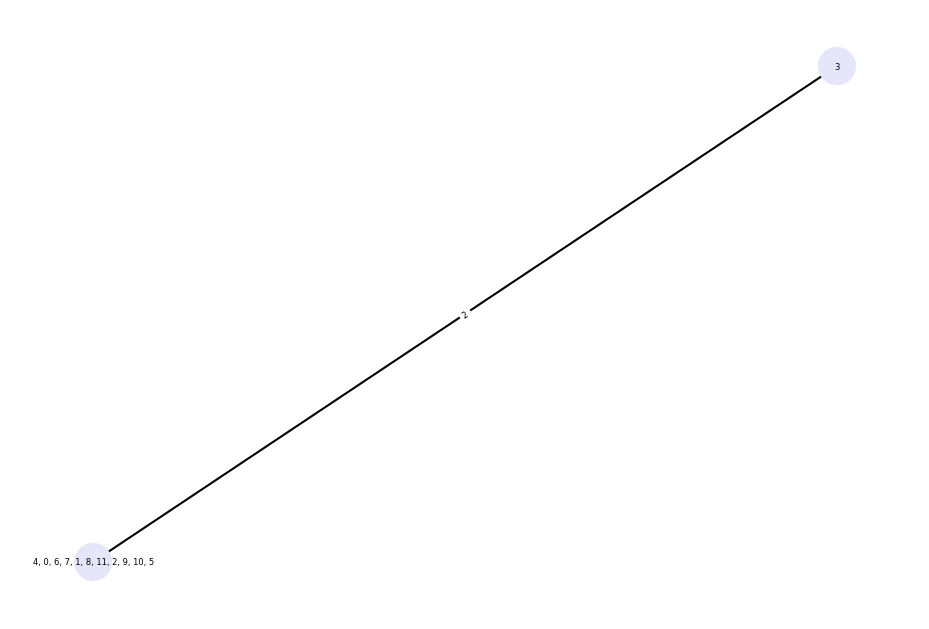

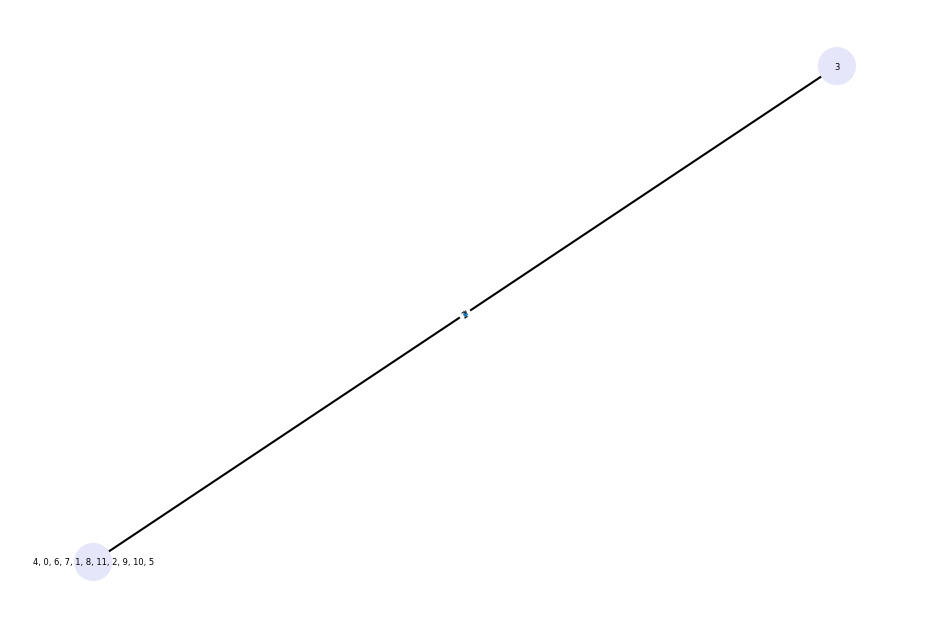

Вес максимального ребра из v4 равен 2
Закарачиваем все ребра с пропускной способностью >= 2


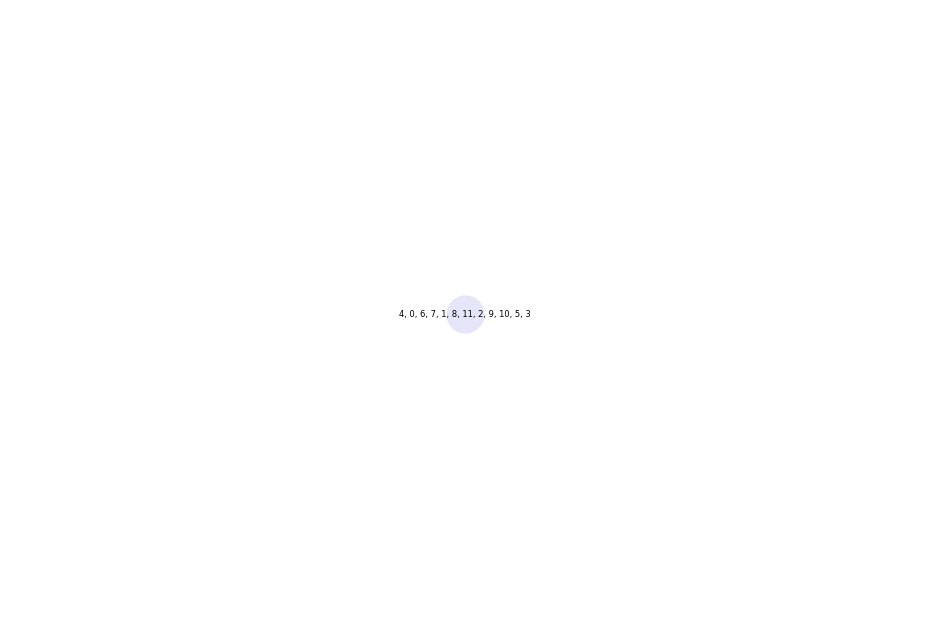

In [6]:
def merge(x, y):
    if y in [s, t]:
        x, y = y, x
    for z in G[y]:
        if z in G[x]:
            G[x][z]['weight'] = max(G[x][z]['weight'], G[y][z]['weight'])
        elif z != x:
            G.add_edge(x, z, weight = G[y][z]['weight'])
    for p in path[y]:
        path[x].append(p)
    
    G.remove_node(y)
    if x in [s, t] and y in [s, t]:
        return True
    return False
def short_edges():
    u = -1
    v = -1
    for x, y in G.edges():
        if G[x][y]['weight'] >= w and x < y:
            u = x
            v = y
            break
    return u, v

print(f"Ищем путь с максимальной пропускной способностью из v{s} в v{t}")
w = 1e9
br = False
while not br:
    draw_cut()
    w = max([G[s][u]['weight'] for u in G[s]])
    print(f"Вес максимального ребра из v{s} равен {w}")
    print(f"Закарачиваем все ребра с пропускной способностью >= {w}")
    while True:
        u, v = short_edges()
        if u == -1:
            break
        if merge(u, v):
            br = True
            break
    draw()